# Analysis of hypotheses and A/B-testing for increasing revenue of an online store

This research focuses on prioritizing and testing hypotheses aimed at increasing the revenue of an online store. The work will involve close collaboration with the marketing department, resulting in a list of hypotheses, each with the potential to contribute to revenue growth. After prioritizing the hypotheses using various methods, A/B testing will be conducted on the most promising ideas. The goal of the research is to identify which proposed changes lead to positive user behavior changes and revenue growth and can therefore be implemented on a permanent basis. The research will utilize two datasets.

For prioritizing the hypotheses, we will use the dataset located at `/datasets/hypothesis.csv`.

- `Hypothesis` — a brief description of the hypothesis;
- `Reach` — user reach on a 10-point scale;
- `Impact` — impact on users on a 10-point scale;
- `Confidence` — confidence in the hypothesis on a 10-point scale;
- `Efforts` — resource expenditure to test the hypothesis on a 10-point scale. The higher the value of 'Efforts', the more expensive it is to test the hypothesis.

For conducting A/B testing, we will use two datasets: `/datasets/orders.csv` and `/datasets/visitors.csv.`

File `/datasets/orders.csv`:

- `transactionId` — order identifier;
- `visitorId` — user identifier for the person who placed the order;
- `date` — date when the order was placed;
- `revenue` — revenue from the order;
- `group` — A/B test group the order belongs to.

File `/datasets/visitors.csv`:

- `date` — date;
- `group` — A/B test group;
- `visitors` — number of users in the specified A/B test group on the given date.

To start the research, let's import the necessary libraries and define useful functions.

In [37]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
def primary_analysis(df):

    print("Dataframe information:")
    print(df.info())
    
    print("\nFirst 5 rows of the dataframe:")
    print(df.head())
    
    print("\nDescription of numerical columns:")
    print(df.describe())
    
    print("\nNumber of explicit duplicates in the dataset:")
    print(df.duplicated().sum())
    
    print("\nDistribution frequency for categorical columns:")
    for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"\nColumn '{column}':")
        print(df[column].value_counts())

## Hypotheses prioritization

The file `hypothesis.csv` contains 9 hypotheses aimed at increasing the revenue of an online store. Each hypothesis is accompanied by an evaluation of parameters such as `Reach`, `Impact`, `Confidence`, and `Effort`. Let's first take a look at the structure of the proposed data:

In [39]:
pd.set_option('display.max_colwidth', None)

In [40]:
try:
    data_hyp = pd.read_csv('/datasets/hypothesis.csv')
except:
    data_hyp = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [41]:
primary_analysis(data_hyp)

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None

First 5 rows of the dataframe:
                                                                                                     Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что

In [42]:
data_hyp.columns = [x.lower() for x in data_hyp.columns]

The data is correct, there are no duplicates, and the formatting meets the requirements. The hypotheses are formulated correctly, and at first glance, the gradation of parameters appears to be well-founded. We can proceed to the prioritization of the proposed hypotheses.

To begin, let's apply the ICE framework for hypothesis prioritization and sort them in descending order of priority. 

In [43]:
data_hyp['ICE'] = (data_hyp['impact'] * data_hyp['confidence'])/data_hyp['efforts'] 
sorted_data_hyp_ice = data_hyp[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
sorted_data_hyp_ice['ICE'] = sorted_data_hyp_ice['ICE'].round(3)
display(sorted_data_hyp_ice)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Following the ICE framework, the hypothesis regarding the launch of a promotion offering a discount on a customer's birthday should be considered first. The second priority is the hypothesis that adding two new channels for traffic acquisition could increase the number of users by 30%. The third most important hypothesis is implementing a subscription form on all key pages to build an email marketing list. The lowest priority hypothesis is the one suggesting changing the background color of the homepage to increase user engagement.

Let's try applying the RICE framework and see how the prioritization has changed.

In [44]:
data_hyp['RICE'] = (data_hyp['reach'] * data_hyp['impact'] * data_hyp['confidence'])/data_hyp['efforts'] 
sorted_data_hyp_rice = data_hyp[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
sorted_data_hyp_rice['RICE'] = sorted_data_hyp_rice['RICE'].round(3)
display(sorted_data_hyp_rice)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


The situation has changed somewhat, but hypotheses number 7 and 2 remain among the leaders. The hypothesis about adding a subscription form to all key pages, aimed at building an email marketing list, has moved to the first place with a clear advantage. This is explained by the fact that the reach parameter for this hypothesis, which defines user reach, is at its maximum value of 10. The hypothesis about adding product recommendation blocks on the online store's website to increase conversion and average order value has moved to second place, also with a high reach value of 10. The hypothesis about adding two new channels to attract traffic, which would increase the number of users by 30%, shifted from second to third place. The previous leader, the hypothesis about launching a promotion offering a discount on a customer's birthday, has dropped to the middle of the list due to its minimal reach, which is 1. At the last place remains the hypothesis about changing the background color of the homepage to increase user engagement.

The change in hypothesis prioritization when applying RICE instead of ICE occurred mainly due to the emphasis on Reach in the RICE framework. This parameter reflects the number of users who will be affected by the change and significantly influences the priority of the hypotheses. This is clearly demonstrated by hypothesis 8, which, despite having relatively high confidence and impact parameters and an average effort level, ranked first in the ICE framework. However, when converting this list to the RICE framework, the situation for this hypothesis changes, and it falls to the middle of the list due to its reach parameter being only 1, compared to hypothesis 7, which has the maximum reach of 10.

In any case, two hypotheses have remained in the top 3 in both frameworks:

- Add a subscription form to all key pages to build an email marketing list.
- Add two new traffic acquisition channels, which will increase the number of users by 30%.

## A/B testing analysis

We conducted an A/B test and obtained results, which are described in the files `orders.csv` and `visitors.csv`. Let's first take a look at the structure of the provided data:

In [45]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [46]:
primary_analysis(visitors)

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

First 5 rows of the dataframe:
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756

Description of numerical columns:
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000

Number of explicit duplicates in the dataset:
0

Distribution frequency for categorical columns:

Column 'date':
date
2019-08-01    2
2019-08-02    2
2019-08-03    2
2019-08-04    2
2019-08-05    2
2019-08-06    2
2019-0

There are no duplicates or missing values in the dataframe. The mean and median values are relatively close to each other, indicating the absence of significant outliers in the data. The traffic distribution between the test groups appears to be correct. However, the format of the date column, represented as an object, could potentially lead to issues in data processing. To ensure proper handling of dates, the column should be converted to the `datetime64` type.

In [47]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [48]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')


In [49]:
primary_analysis(orders)

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

First 5 rows of the dataframe:
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

Description of numerical columns:
       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03  1.197000e+03
mean    2.155

As in the previous dataframe, there are no duplicates or missing values here, but the significant difference between the median (2978) and the mean (8348) indicates that there are serious outliers in the data. We will take a closer look at these anomalies later. Additionally, we can observe that users are unevenly distributed between segments, which poses a risk of obtaining completely incorrect A/B test analysis results. Also, the date column is in the `object` format. Let's start by fixing this last issue.

In [50]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Success! Now let's check if there are any users in the `orders` table who are assigned to two groups simultaneously.

In [51]:
group_counts = orders.groupby('visitorId')['group'].nunique()
multi_group_users = group_counts[group_counts > 1]
display(multi_group_users)
display(multi_group_users.shape[0]) 

visitorId
8300375       2
199603092     2
232979603     2
237748145     2
276558944     2
351125977     2
393266494     2
457167155     2
471551937     2
477780734     2
818047933     2
963407295     2
1230306981    2
1294878855    2
1316129916    2
1333886533    2
1404934699    2
1602967004    2
1614305549    2
1648269707    2
1668030113    2
1738359350    2
1801183820    2
1959144690    2
2038680547    2
2044997962    2
2378935119    2
2458001652    2
2579882178    2
2587333274    2
2600415354    2
2654030115    2
2686716486    2
2712142231    2
2716752286    2
2780786433    2
2927087541    2
2949041841    2
2954449915    2
3062433592    2
3202540741    2
3234906277    2
3656415546    2
3717692402    2
3766097110    2
3803269165    2
3891541246    2
3941795274    2
3951559397    2
3957174400    2
3963646447    2
3972127743    2
3984495233    2
4069496402    2
4120364173    2
4186807279    2
4256040402    2
4266935830    2
Name: group, dtype: int64

58

We can observe that the traffic is divided incorrectly — 58 users are assigned to both groups simultaneously. This indicates that users are unevenly distributed between the segments. Ideally, these overlapping users should be removed, but to do this correctly, they would need to be removed from both datasets. However, the visitors table already contains aggregated data, and effectively cleaning both tables is not possible. Therefore, we will keep the overlapping users in the test, which unfortunately could lead to distortion of the test results.

Let's build and take a look at the cumulative revenue chart by groups.

In [52]:
# create an array of unique pairs of date and test group values
datesGroups = orders[['date','group']].drop_duplicates() 

In [53]:
# collect aggregated daily cumulative order data
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [54]:
# collect aggregated daily cumulative visitor data for the online store
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [55]:
# merge both tables into one with clear column names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


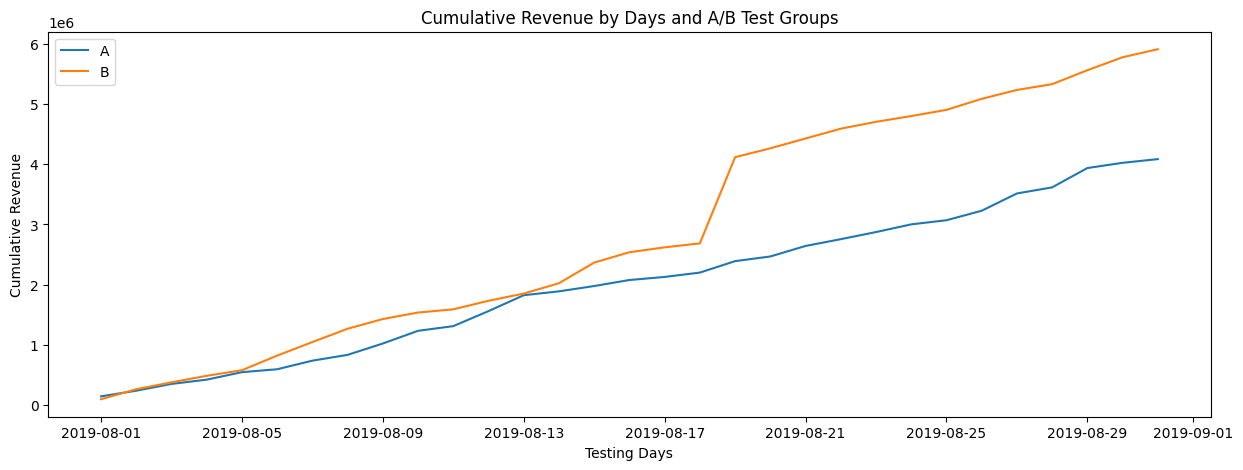

In [56]:
# plot cumulative revenue charts by days and A/B test groups
# dataframe with cumulative number of orders and cumulative revenue by day in group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# dataframe with cumulative number of orders and cumulative revenue by day in group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# plotting revenue for group A
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# plotting revenue for group B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Testing Days')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue by Days and A/B Test Groups')
plt.legend() 
plt.show()

Revenue increases steadily throughout the test. In the first week, groups A and B show similar results, but then group B pulls ahead and, after a significant jump, continues a steady growth. This jump is likely caused by a large purchase—an anomaly that we will address later. Revenue for group A also continues to grow, but more steadily without fluctuations.

Let's build and take a look at the cumulative average check by groups — dividing cumulative revenue by cumulative number of orders

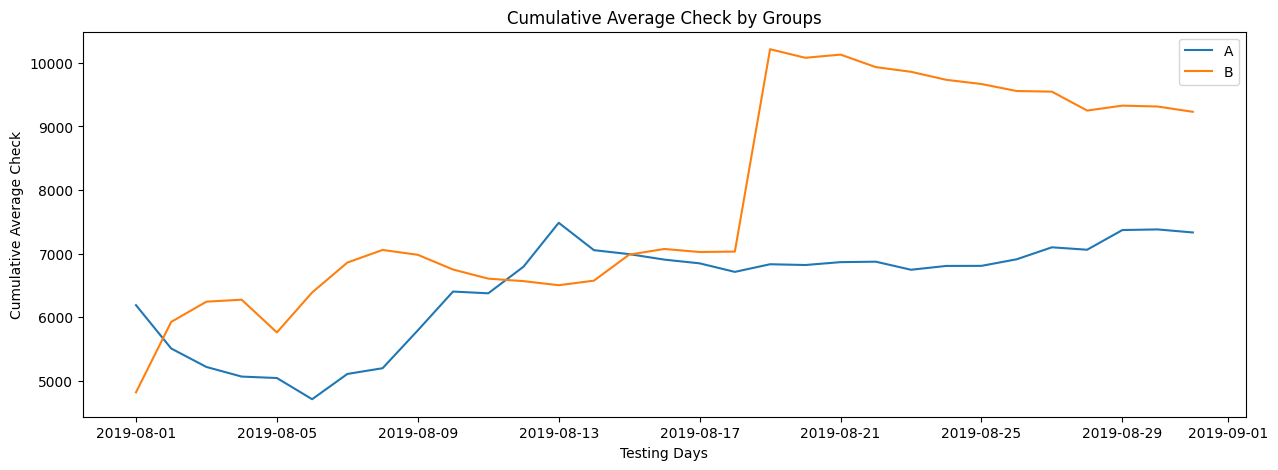

In [57]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Testing Days')
plt.ylabel('Cumulative Average Check')
plt.title('Cumulative Average Check by Groups')
plt.legend() 
plt.show()

The cumulative average check in the first half of the test shows fluctuations across segments. In group A, the value decreases from 6200 to 4800 during the first few days, while in group B, it increases from 4800 to 6200, which we also observed in the first graph. Later, group B's value spikes sharply due to an unusually large purchase. In the second half of the test, the average check values stabilize and demonstrate steady growth, with group B showing a more pronounced increase than group A.

Let's plot the graph of the relative change in the cumulative average check of group B to group A.

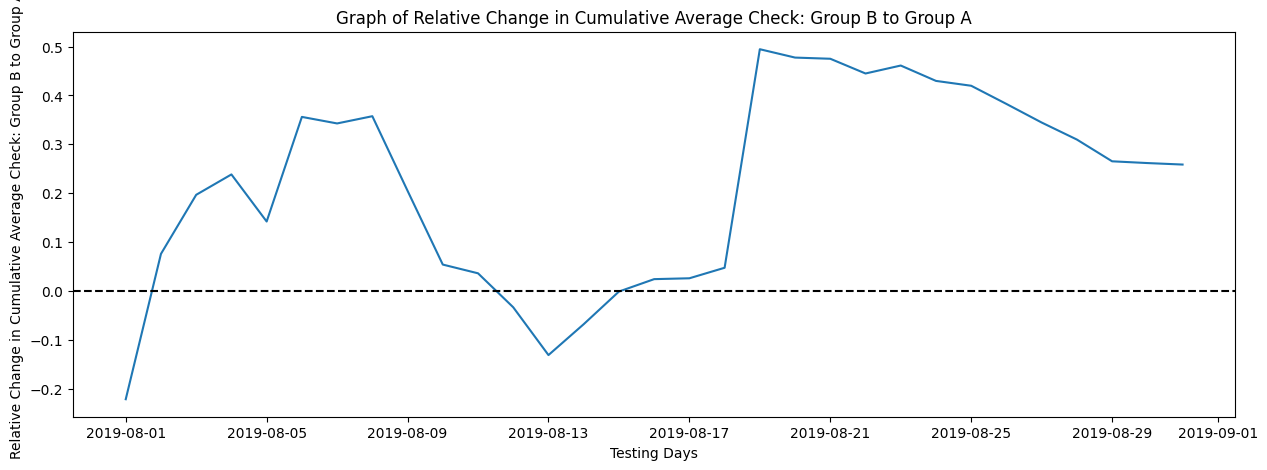

In [58]:
# Merging data into one dataframe
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Plotting the ratio of average checks
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Adding the X-axis
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Testing Days')
plt.ylabel('Relative Change in Cumulative Average Check: Group B to Group A')  
plt.title('Graph of Relative Change in Cumulative Average Check: Group B to Group A')
plt.show()

As with the previous two graphs, significant fluctuations are observed in the first half of the test, while in the second half, the values stabilize relatively.

Let's plot a graph of the cumulative average number of orders per visitor by group over the days.

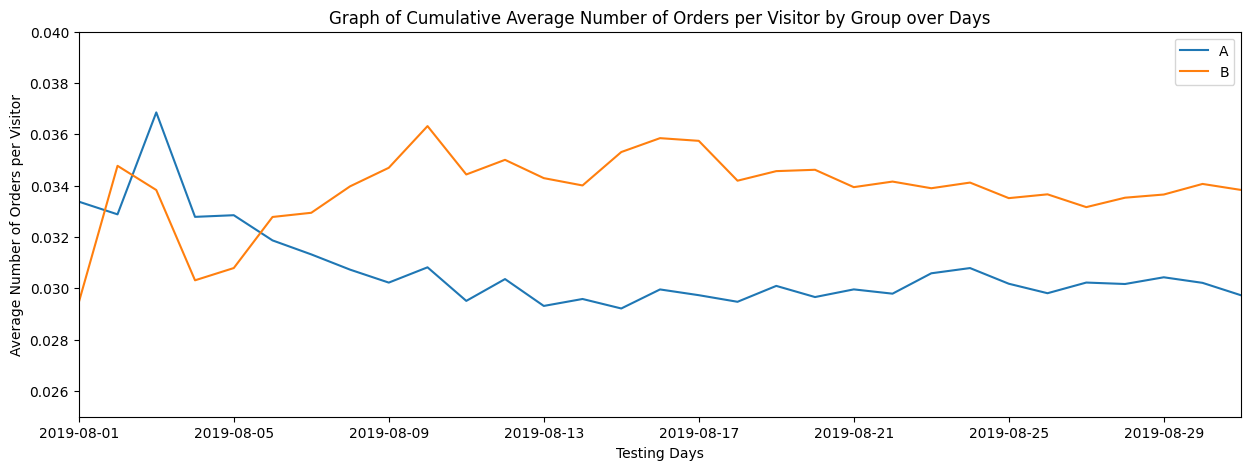

In [59]:
# calculate the average number of orders per visitor
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# separate data for group A
plt.figure(figsize=(15, 5))
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# separate data for group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# plot the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
# set axis scale
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.025,0.04])
plt.xlabel('Testing Days')
plt.ylabel('Average Number of Orders per Visitor')  
plt.title('Graph of Cumulative Average Number of Orders per Visitor by Group over Days')
plt.legend()
plt.show()

At the beginning of the test, the values in both groups change unstably, with strong fluctuations. After the first period of fluctuations, group B consistently outperforms group A, and overall, group B shows better results compared to group A.

Let's plot the graph of the relative change in the cumulative average number of orders per visitor of group B compared to group A.

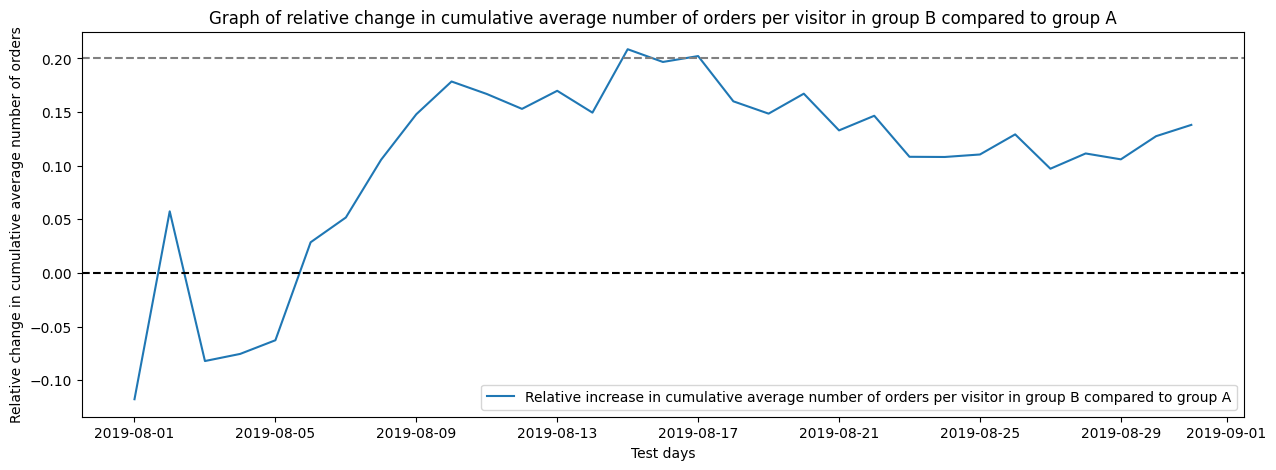

In [60]:
# Merging the data into one dataframe
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# Plotting the ratio of average number of orders
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative increase in cumulative average number of orders per visitor in group B compared to group A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xlabel('Test days')
plt.ylabel('Relative change in cumulative average number of orders')  
plt.title('Graph of relative change in cumulative average number of orders per visitor in group B compared to group A')
plt.legend()
plt.show()

After fluctuations in the first week of the test, group B leads in the metric: it improves over time and then stabilizes around a 20% increase compared to group A.

Let's create a scatter plot of the number of orders per user.

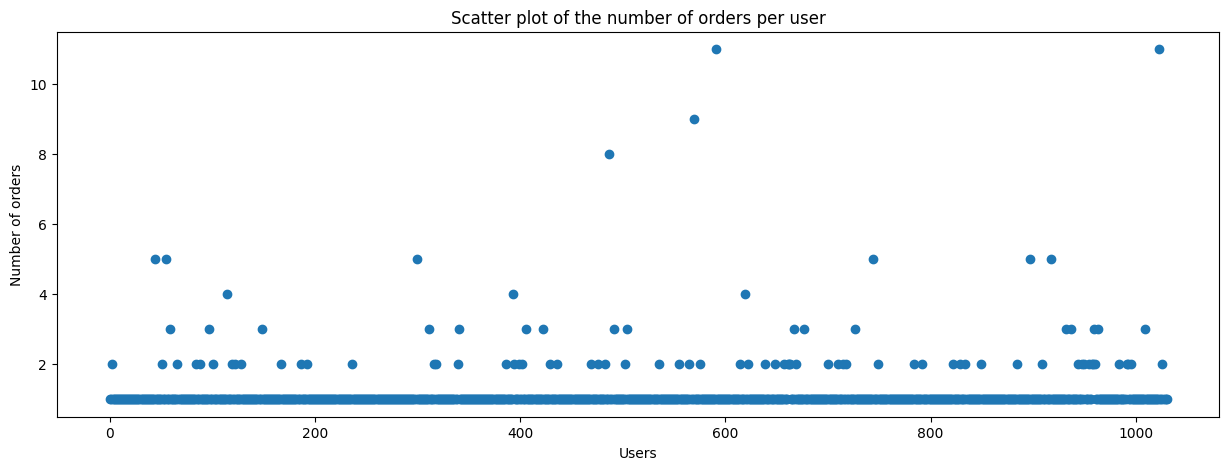

In [61]:
# count the number of orders per user
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']
# create a scatter plot of the number of orders per user
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Users')
plt.ylabel('Number of orders')  
plt.title('Scatter plot of the number of orders per user')
plt.show()

The majority of users have between 0 and 2 orders. There are also many users with 2 to 4 orders. Their exact proportion is unclear — it's uncertain whether they should be considered anomalies or not. Users with more than 4 orders can also be found.

Let's calculate the 95th and 99th percentiles of the number of orders per user and try to choose a boundary for identifying anomalous users.

In [62]:
display(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

array([1., 2., 4.])

No more than 5% of users placed more than 2 orders, and 10% of users ordered more than once. It is reasonable to set the upper limit for the number of orders per user at 2 orders and filter out anomalous users based on this threshold.

Let's calculate the 95th and 99th percentiles of order value and try to set a threshold for identifying anomalous users.

In [63]:
display(np.percentile(orders['revenue'], [90, 95, 99]))

array([18168. , 28000. , 58233.2])

No more than 5% of orders exceed 28,000 rubles, and no more than 1% exceed 58,233 rubles. It makes sense to set 28,000 rubles per order as the upper threshold and exclude anomalous users based on that. 

Let's calculate the statistical significance of the difference in the average number of orders per visitor between the groups based on the "raw" data. The significance level is the probability of obtaining a value that is far from the expected value under the null hypothesis in a real observation. Since the metric is quantitative and there are outliers, we will use the Mann-Whitney test to calculate the statistical significance.

- H0 = The average number of orders per visitor is the same in both groups.
- H1 = The average number of orders per visitor differs between the groups.
- Significance level 𝛼 = 0.05

Let's prepare the data for calculating the statistical significance.

In [64]:
# Calculate the number of users on the selected date in group A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Calculate the cumulative number of users up to and including the selected date in group A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# The same for group B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Calculate the number of orders and total revenue on the selected date in group A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Calculate the cumulative number of orders and total revenue up to and including the selected date in group A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# The same for group B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Merge all the 8 new datasets into one
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Let's create variables in which we will specify the number of orders made for users who have placed at least one order.

In [65]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

Let's create variables where users from different groups will correspond to the number of orders. Those who did not place any orders will correspond to zeros.

In [66]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Let's apply the test criterion and format the p-value, rounding it to three decimal places. We will also calculate and display the relative growth of the average number of orders for group B.

In [67]:
display("Mann-Whitney p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))  # p-value
display("Relative growth of the average number of orders for group B to group A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))  # relative growth

'Mann-Whitney p-value: 0.017'

'Relative growth of the average number of orders for group B to group A: 0.138'

Based on the "raw" data, the null hypothesis of equality in the average number of orders can be rejected, as the p-value is 0.017, which is less than the significance level of 0.05. The relative increase amounts to 13.8%.

Let us calculate the statistical significance of differences in the average order value between groups based on the "raw" data. We will use the same algorithm as before.

- H0 = The average order value is the same in both groups.
- H1 = The average order value differs between groups.
- Significance level 𝛼 = 0.05

In [68]:
display("p-value for the Mann-Whitney test: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display("Relative increase in the average order value of group B compared to group A: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'p-value for the Mann-Whitney test: 0.729'

'Relative increase in the average order value of group B compared to group A: 0.259'

The p-value is significantly greater than 0.05. Therefore, there is no reason to reject the null hypothesis and conclude that there are differences in the average order value. However, the average order value of group B is significantly higher than that of group A – by 25.9%.

Let us calculate the statistical significance of differences in the average number of orders per visitor between groups based on the "cleaned" data. We will use the same algorithm as before, but first, we will correct the data.

We will consider users as anomalous if they made more than 2 orders or placed an order costing more than 25,000 rubles. This way, we will remove 5% of users with the highest number of orders and 1% to 5% of users with expensive orders. We will create slices of users with more than 2 orders — usersWithManyOrders and users who made orders costing more than 25,000 rubles — usersWithExpensiveOrders. Then, we will combine them in the abnormalUsers table.

In [69]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitorId'], 
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0]) 

C:\Users\Артемий Иванилов\AppData\Local\Temp\ipykernel_23500\1691492580.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitorId'],
C:\Users\Артемий Иванилов\AppData\Local\Temp\ipykernel_23500\1691492580.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitorId'],
C:\Users\Артемий Иванилов\AppData\Local\Temp\ipykernel_23500\1691492580.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in futu

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

74

In total, there are 74 anomalous users. Let's see how their actions affected the test results. We will calculate the statistical significance of differences in the average number of orders between the test groups based on the cleaned data.

- H0 = The average number of orders per visitor is the same in both groups.
- H1 = The average number of orders per visitor differs between groups.
- Significance level 𝛼 = 0.05

In [70]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [71]:
display("p-value for the Mann-Whitney test: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display("Relative increase in the average number of orders of group B compared to group A: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'p-value for the Mann-Whitney test: 0.013'

'Relative increase in the average number of orders of group B compared to group A: 0.173'

The results for the average number of orders have hardly changed. Let's calculate the statistical significance of differences in the average order value between groups based on the "cleaned" data.

- H0 = The average order value is the same in both groups.
- H1 = The average order value differs between groups.
- Significance level 𝛼 = 0.05

In [72]:
display(
    "p-value for the Mann-Whitney test: {0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "Relative increase in the average order value of group B compared to group A: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'p-value for the Mann-Whitney test: 0.738'

'Relative increase in the average order value of group B compared to group A: -0.020'

The p-value has decreased, but it remains significantly above 0.05. This means there is still no basis for rejecting the null hypothesis and claiming that there are differences in the average order value. A significant change is observed in the relative increase in the average number of orders for group B: now group B shows not an increase, but a decrease relative to group A by 2%.

Based on the analysis of the A/B test results, the following can be stated:

- There is a statistically significant difference between groups A and B in the average number of orders, both based on the raw data and after anomaly filtering. This indicates clear differences in the effectiveness of the groups.
- No statistically significant differences in the average order value were found between groups A and B, both on the raw data and after anomaly filtering. This suggests that the average order size remains similar in both groups.
- Revenue shows a steady increase throughout the test. During the first week, both groups show comparable results. However, after that, group B begins to outperform group A, and, after a small spike, continues a steady growth. Group A also continues to show revenue growth, but more steadily and without sharp changes.
- The conversion difference chart shows that group B performs better compared to group A. Group B's results either show a tendency to grow or have stabilized at a level above the average.
- The average order value difference chart fluctuated in the first half of the test but then stabilized at values close to zero, confirming the absence of differences in this metric.

Continuing the test is not meaningful since group B statistically outperforms group A in key metrics. The conversion chart confirms the stability of the achieved result. It is recommended to conclude the test, consider it successful, and move on to testing the next hypothesis.

## Conclusion

In the course of the conducted study, hypothesis prioritization was performed using the ICE and RICE frameworks. The analysis was based on data from the file hypothesis.csv. These frameworks allowed for an objective evaluation of each hypothesis’s potential in terms of its impact on key business metrics such as revenue, conversion, and customer base growth.

As a result of the analysis, two hypotheses were identified as deserving the most attention and priority implementation, as both ranked in the top 3 of both frameworks:

- Add a subscription form to all main pages to build a customer base for email marketing.
- Add two new traffic acquisition channels, which will allow attracting 30% more users.

To evaluate the effectiveness of the proposed hypotheses for increasing the revenue of the online store, A/B testing was conducted. The experiment was based on data from the files orders.csv and visitors.csv.

- There is a statistically significant difference between groups A and B in the average number of orders.
- No statistically significant differences in the average order value were found between groups A and B.
- Revenue shows a steady increase throughout the test. Group B outperforms group A after the first week of testing.
- The conversion difference chart shows that group B performs better compared to group A.
- The average order value difference chart fluctuated in the first half of the test but then stabilized at values close to zero, indicating no difference in the average order value between the groups.

Based on the obtained data, it can be concluded that continuing the A/B test is not advisable, as group B statistically outperforms group A in key metrics. The test results convincingly show that the changes proposed and tested on group B have a positive impact on the revenue of the online store.

It is recommended to conclude the testing, consider it successful, and proceed with implementing the next hypothesis from the priority list.